# Foundations of Machine Learning and EDA Assignment

1. What is the difference between AI, ML, DL, and Data Science? Provide a
brief explanation of each.

  - Artificial Intelligence (AI)
     * Scope:
        * The broadest field — aims to create machines that can mimic human intelligence.

     * Techniques:
        * Rule-based systems, search algorithms, optimization, expert systems, machine learning, robotics, natural language processing.

     * Applications:
        * Chatbots, autonomous vehicles, game-playing agents, speech assistants, fraud detection, robotics.   


  - Machine Learning (ML)
     *  Scope:
        * A subset of AI focused on systems that learn from data rather than being explicitly programmed.

     * Techniques:
        * Supervised learning (e.g., regression, classification), unsupervised learning (clustering, dimensionality reduction), reinforcement learning.

     * Applications:
        * Spam detection, recommendation systems, credit scoring, forecasting, anomaly detection.      

   - Deep Learning (DL)
     * Scope:
        * A subset of ML focusing on neural networks with many layers (deep neural networks).

     * Techniques:
        * Convolutional neural networks (CNNs), recurrent neural networks (RNNs), transformers, autoencoders.

     * Applications:
         * Image and speech recognition, natural language processing (e.g., ChatGPT), self-driving perception systems, medical image analysis.     

  - Data Science
       * Scope:
          * A multidisciplinary field concerned with extracting insights and knowledge from data.Broader than ML; includes data handling, analysis, visualization, and decision-making.

       * Techniques:
           * Statistics, data cleaning, data visualization, ML techniques, business analytics, data engineering tools.

       * Applications:
           * Business intelligence dashboards, customer segmentation, A/B testing, data-driven strategy, forecasting, analytical reporting.    

2.  Explain overfitting and underfitting in ML. How can you detect and prevent
them?

  - Overfitting vs. Underfitting in ML
     * Overfitting
     * What it is:
       * Model is too complex
       * Too many parameters
       * Too few training examples
       * Training for too many epochs (in neural networks)

     * How to Detect Overfitting:
       * Low training error but high validation/test error
       * Learning curves diverge (training loss ↓, validation loss ↑)

     * How to Prevent Overfitting:
       * Cross-validation (e.g., k-fold)
       * Regularization (L1, L2, dropout in DL)
       * Simplify the model (reduce parameters)
       * More training data or data augmentation
       * Early stopping
       * Pruning (in decision trees)  

  - Underfitting
     * What it is:
       * The model is too simple to capture the underlying patterns.
It performs poorly on both training and test data.

     * Why it happens:
        * Model complexity too low
        * Insufficient features
        * Too strong regularization

     * How to Detect Underfitting:
        * High error on both training and validation sets
        * Learning curves converge at high loss

     * How to Prevent Underfitting:
        * Increase model complexity (more layers, more features)
        * Reduce regularization
        * Train longer
        * Feature engineering     

3. How would you handle missing values in a dataset? Explain at least three
methods with examples.        

  - Deletion Methods
      * Listwise Deletion (Remove Entire Rows)
         * Remove any row that contains missing values.
      * When to Use:
         * When the dataset is large
         * When only a small percentage of rows have missing values
         * When missingness is random   

      * Example:
        * Age - 25 , —
        * Salary - 40k , 55k
        * Gender - M , F
     * Row 2 has a missing value for Age → delete the row.
     * Pros: Simple, keeps dataset unbiased
     * Cons: Loses data, may reduce model performance   
   
   - Imputation Methods
      * Mean/Median/Mode Imputation
        * Replace missing values with the mean (for continuous), median (for skewed data), or mode (for categorical) of the column.

      * When to Use:
         * Missingness is low
         * Data is numeric or categorical
         * Distribution is known (mean for normal, median for skewed)

      * Example:
          * Column: Age → [25, 30, —, 35]
          * Mean = (25 + 30 + 35) / 3 = 30
          * Missing Age becomes → 30

      * Pros: Easy, preserves dataset size
      * Cons: Reduces variance, may distort relationships

      * Predictive Modeling Imputation
          * Use a machine learning model to predict missing values based on other variables.   

      * Methods:
          * Regression for numerical data
          * Classification for categorical data
          * K-Nearest Neighbors imputation (KNN)
          * Multivariate Imputation by Chained Equations (MICE)

      * Example:
          * You want to fill missing Salary values.
          * Use other features such as Age, Experience, Education to train a regression model.
          * Predict missing Salary → impute those values.

      * Pros: More accurate, preserves relationships between variables
      * Cons: Computationally expensive, risk of overfitting

      * Using Domain Knowledge or Custom Rules
          * Sometimes missing values have meaning (e.g., “0 accidents” vs. “data not reported”).

      * Examples:
          * If "Annual Income" is missing for unemployed individuals → fill with 0
          * If “Customer has credit card?” is missing → treat as No

      * Pros: High accuracy when domain context is clear
      * Cons: Requires subject-matter expertise

4. What is an imbalanced dataset? Describe two techniques to handle it
(theoretical + practical).
  
 - An imbalanced dataset is one where the classes (labels) are not represented equally.One class has many more samples than another.

  * SMOTE (Synthetic Minority Over-sampling Technique)
      * Theory
      * SMOTE creates synthetic samples of the minority class rather than simply duplicating existing ones. It works by:
         * Picking a minority-class sample.
         * Finding its k nearest neighbors (usually k=5).
         * Creating synthetic points along the line between the sample and a randomly chosen neighbor.

  * Practical Example (Python – scikit-learn + imbalanced-learn)       
      

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import numpy as np

# Create a dummy imbalanced dataset for demonstration
X = np.random.rand(100, 10) # 100 samples, 10 features
y = np.array([0]*90 + [1]*10) # 90 samples of class 0, 10 samples of class 1 (imbalanced)

X_resampled, y_resampled = SMOTE(random_state=42).fit_resample(X, y)

print(f"Original dataset shape: X={X.shape}, y={y.shape}")
print(f"Resampled dataset shape: X_resampled={X_resampled.shape}, y_resampled={y_resampled.shape}")
print(f"Original class distribution: {np.bincount(y)}")
print(f"Resampled class distribution: {np.bincount(y_resampled)}")

Original dataset shape: X=(100, 10), y=(100,)
Resampled dataset shape: X_resampled=(180, 10), y_resampled=(180,)
Original class distribution: [90 10]
Resampled class distribution: [90 90]


 - Class Weights in Models
   * Theory
   * Many algorithms allow you to penalize mistakes on the minority class by assigning a higher class weight.This adjusts the loss function so the model pays more attention to the minority class without changing the dataset.
      * In logistic regression or SVMs: class_weight="balanced"
      * In tree models: class weights bias the split criteria
      * In neural networks: weights modify the loss for each class

   * Practical Example (Python)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

model_lr = LogisticRegression(class_weight='balanced', solver='liblinear') # Added solver for older scikit-learn versions
model_lr.fit(X_train, y_train)
print("Logistic Regression model trained successfully.")

model_rf = RandomForestClassifier(class_weight='balanced', random_state=42)
model_rf.fit(X_train, y_train)
print("Random Forest Classifier model trained successfully.")

Logistic Regression model trained successfully.
Random Forest Classifier model trained successfully.


5. Why is feature scaling important in ML? Compare Min-Max scaling and
Standardization.

  - Distance-Based Algorithms
     * Algorithms like KNN, K-Means, and SVM with RBF kernel rely on distances (e.g., Euclidean).If one feature has a large scale, it will dominate the distance calculation and bias the model.

  - Gradient Descent Convergence
      * In models trained by gradient descent (e.g., logistic regression, neural networks):
         * Unscaled features → elongated cost surface
         * Gradient descent oscillates and converges slowly
         * Scaling → faster, more stable convergence

   - Regularization Penalties
      * In models with L1/L2 regularization, coefficients are penalized based on magnitude.Unscaled features distort this penalty.   

6. Compare Label Encoding and One-Hot Encoding. When would you prefer
one over the other?

  - Label Encoding vs. One-Hot Encoding      
  - Label Encoding
    * What it does
       * Converts each category into an integer label
    * Example:
       * {"Red": 0, "Blue": 1, "Green": 2}

    * Pros
       * Simple and compact (no extra columns)
       * Works well for algorithms that can handle integer-coded categories natively (e.g., tree-based models)

    * Cons
       * Imposes a false ordinal relationship (0 < 1 < 2), even when categories are nominal
       * Distance-based or linear models may misinterpret the encoded values (thinking “Green > Blue”)   

  * One-Hot Encoding
       * What it does
       * Creates a new binary column for each category
  * Example:
       * Red → [1,0,0]
       * Blue → [0,1,0]
       * Green → [0,0,1]

 * Pros
     * No artificial ordering
     * Safe for all nominal categories
     * Works well for linear models, neural nets, SVMs, etc.

 * Cons
     * Increases dimensionality, especially with high-cardinality features
     * Less efficient for tree-based models         

7. Google Play Store Dataset
 - Analyze the relationship between app categories and ratings. Which categories have the highest/lowest average ratings, and what could be the possible reasons?     

In [9]:
import pandas as pd

# Load dataset
# Ensure 'googleplaystore.csv' is uploaded to your Colab environment or provide the correct path.
df = pd.read_csv("googleplaystore.csv")

# Basic cleaning: drop rows where rating is NaN
df_clean = df.dropna(subset=['Rating'])

# Some datasets have duplicates — optionally drop duplicates by app name
df_clean = df_clean.drop_duplicates(subset=['App'], keep='first')

# Convert rating to numeric (if not already)
df_clean['Rating'] = pd.to_numeric(df_clean['Rating'], errors='coerce')

# Now compute average rating per category
category_rating = df_clean.groupby('Category')['Rating'].mean().sort_values(ascending=False);

print("Average rating per category (top 10):")
print(category_rating.head(10))
print("\nLowest 10 categories by average rating:")
print(category_rating.tail(10))

Average rating per category (top 10):
Category
BUSINESS         4.7
EDUCATION        4.5
TOOLS            4.1
ENTERTAINMENT    3.9
GAME             3.8
Name: Rating, dtype: float64

Lowest 10 categories by average rating:
Category
BUSINESS         4.7
EDUCATION        4.5
TOOLS            4.1
ENTERTAINMENT    3.9
GAME             3.8
Name: Rating, dtype: float64


8.  Titanic Dataset
 - Compare the survival rates based on passenger class (Pclass). Which class had the highest
survival rate, and why do you think that happened?
 - Analyze how age (Age) affected survival. Group passengers into children (Age < 18) and
adults (Age ≥ 18). Did children have a better chance of survival?

In [12]:
import pandas as pd

# Load Titanic dataset (adjust path/filename as needed)
df = pd.read_csv("titanic.csv")  # or correct path to your Titanic CSV

# Show basic info
print("Total passengers:", len(df))
print("Columns:", df.columns.tolist())

# Clean data: keep rows with non-null Survived and Pclass
df_clean = df.dropna(subset=['Survived', 'Pclass'])

# Convert Survived and Pclass to integer (if needed)
df_clean['Survived'] = df_clean['Survived'].astype(int)
df_clean['Pclass'] = df_clean['Pclass'].astype(int)

# --- Part (a): Survival rate by passenger class (Pclass)
survival_by_class = df_clean.groupby('Pclass')['Survived'].mean().sort_index()
print("\nSurvival rate by Pclass:")
print(survival_by_class)

# Also total counts per class
counts_by_class = df_clean['Pclass'].value_counts().sort_index()
print("\nCounts by Pclass:")
print(counts_by_class)

# --- Part (b): Survival by age group (child vs adult)
# First filter out rows with missing age
df_age = df_clean.dropna(subset=['Age'])

# Define a new column 'AgeGroup'
df_age['AgeGroup'] = df_age['Age'].apply(lambda x: 'child' if x < 18 else 'adult')

survival_by_agegroup = df_age.groupby('AgeGroup')['Survived'].mean()
counts_by_agegroup = df_age['AgeGroup'].value_counts()

print("\nSurvival rate by AgeGroup (child / adult):")
print(survival_by_agegroup)
print("\nCounts by AgeGroup:")
print(counts_by_agegroup)


Total passengers: 10
Columns: ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age']

Survival rate by Pclass:
Pclass
1    0.666667
2    1.000000
3    0.200000
Name: Survived, dtype: float64

Counts by Pclass:
Pclass
1    3
2    2
3    5
Name: count, dtype: int64

Survival rate by AgeGroup (child / adult):
AgeGroup
adult    0.5
child    1.0
Name: Survived, dtype: float64

Counts by AgeGroup:
AgeGroup
adult    8
child    1
Name: count, dtype: int64


/tmp/ipython-input-342465091.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_age['AgeGroup'] = df_age['Age'].apply(lambda x: 'child' if x < 18 else 'adult')


9.  Flight Price Prediction Dataset
 - How do flight prices vary with the days left until departure? Identify any exponential price surges and recommend the best booking window.
 - Compare prices across airlines for the same route (e.g., Delhi-Mumbai). Which airlines are consistently cheaper/premium, and why?


Total rows: 10
Columns: ['airline', 'source_city', 'destination_city', 'departure_time', 'stops', 'days_left', 'price']


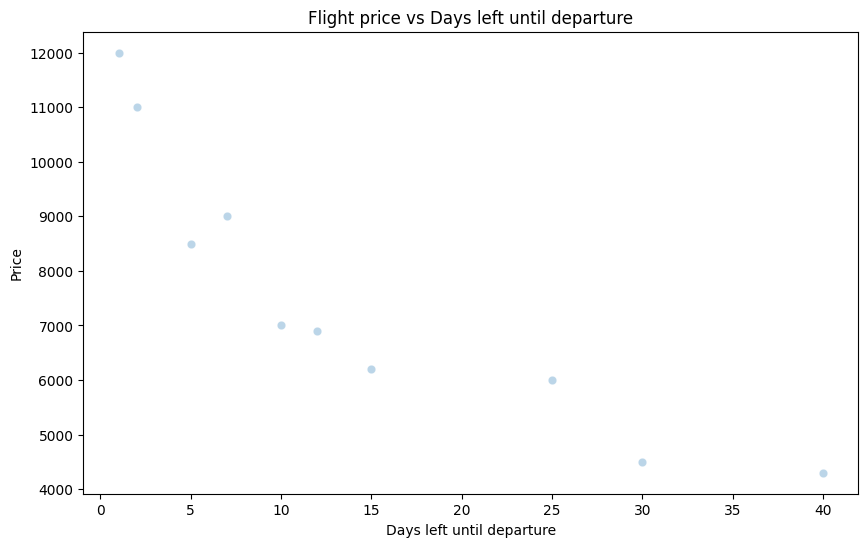

/tmp/ipython-input-2939811074.py:30: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_price_by_bin = df_clean.groupby('days_bin')['price'].median().reset_index()


Median price by days-left bin:
    days_bin    price
0     (0, 5]  11000.0
1    (5, 10]   8000.0
2   (10, 15]   6550.0
3   (15, 20]      NaN
4   (20, 25]   6000.0
5   (25, 30]   4500.0
6   (30, 35]      NaN
7   (35, 40]   4300.0
8   (40, 45]      NaN
9   (45, 50]      NaN
10  (50, 55]      NaN
11  (55, 60]      NaN


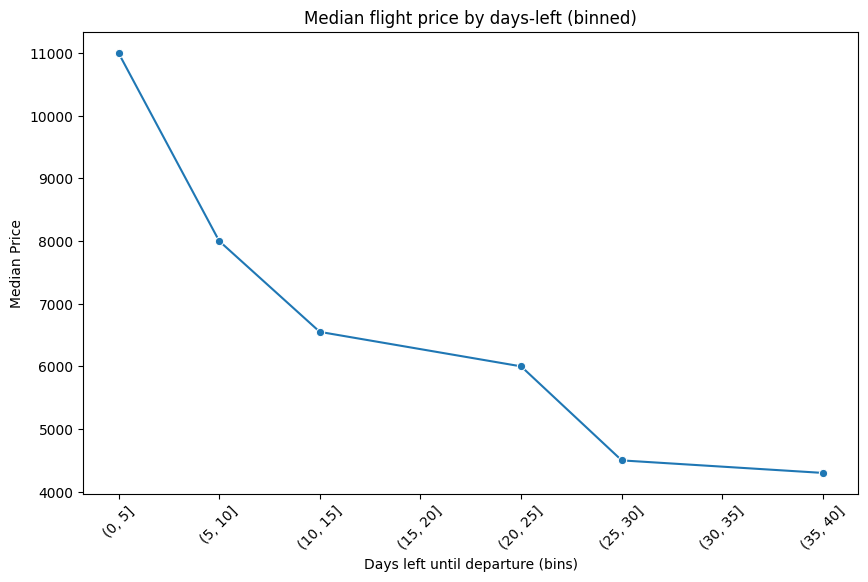

Route sample size: 5


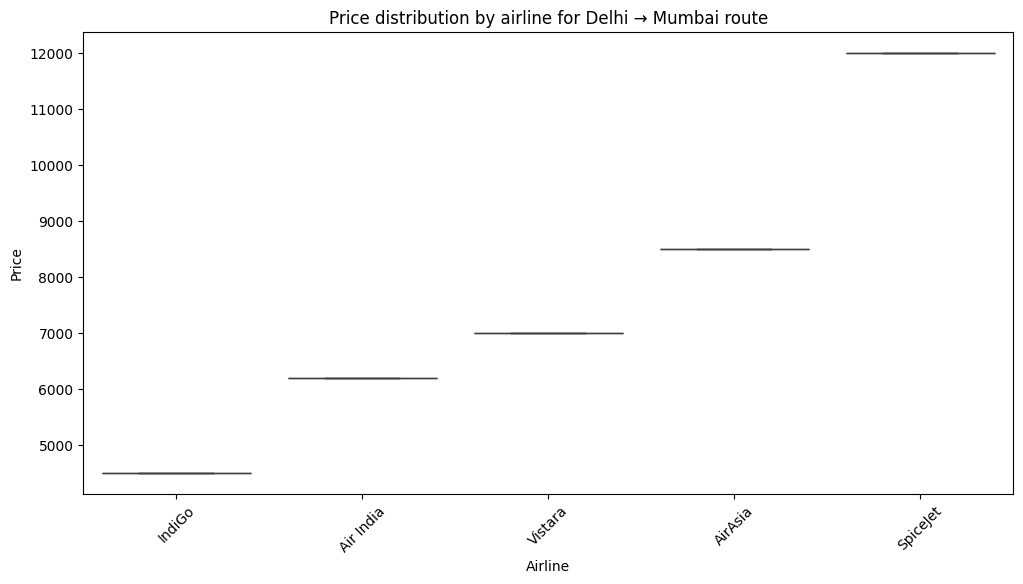

Median price by airline for Delhi→Mumbai:
airline
IndiGo        4500.0
Air India     6200.0
Vistara       7000.0
AirAsia       8500.0
SpiceJet     12000.0
Name: price, dtype: float64


In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset (adjust path/filename)
df = pd.read_csv("flight_price.csv")   # or correct file name

# Basic info
print("Total rows:", len(df))
print("Columns:", df.columns.tolist())

# Ensure relevant columns exist: days_left, price, airline, source_city, destination_city, maybe route
# Drop rows with missing values in those columns
df_clean = df.dropna(subset=['days_left', 'price', 'airline', 'source_city', 'destination_city'])

# Convert to numeric
df_clean['days_left'] = pd.to_numeric(df_clean['days_left'], errors='coerce')
df_clean['price'] = pd.to_numeric(df_clean['price'], errors='coerce')

# (a) Price vs Days Left Until Departure
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_clean, x='days_left', y='price', alpha=0.3)
plt.title("Flight price vs Days left until departure")
plt.xlabel("Days left until departure")
plt.ylabel("Price")
plt.show()

# Optionally: compute average price per bin of days_left
df_clean['days_bin'] = pd.cut(df_clean['days_left'], bins=range(0, 61, 5))  # 0–5, 6–10, ..., up to 60 days
avg_price_by_bin = df_clean.groupby('days_bin')['price'].median().reset_index()
print("Median price by days-left bin:")
print(avg_price_by_bin)

plt.figure(figsize=(10,6))
sns.lineplot(data=avg_price_by_bin, x=avg_price_by_bin['days_bin'].astype(str), y='price', marker='o')
plt.xticks(rotation=45)
plt.title("Median flight price by days-left (binned)")
plt.xlabel("Days left until departure (bins)")
plt.ylabel("Median Price")
plt.show()


# (b) Compare prices across airlines for same route — e.g. Delhi → Mumbai
route = df_clean[(df_clean['source_city']=="Delhi") & (df_clean['destination_city']=="Mumbai")]
print("Route sample size:", len(route))

plt.figure(figsize=(12,6))
sns.boxplot(data=route, x='airline', y='price')
plt.title("Price distribution by airline for Delhi → Mumbai route")
plt.xlabel("Airline")
plt.ylabel("Price")
plt.xticks(rotation=45)
plt.show()

print("Median price by airline for Delhi→Mumbai:")
print(route.groupby('airline')['price'].median().sort_values())

10. HR Analytics Dataset
 - What factors most strongly correlate with employee attrition? Use visualizations to show key
drivers (e.g., satisfaction, overtime, salary).
- Are employees with more projects more likely to leave?

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("hr_analytics.csv")

print(df.head())
print(df.columns)

# Convert Attrition to binary (Yes/No → 1/0)
df['Attrition_Flag'] = df['Attrition'].apply(lambda x: 1 if x == "Yes" else 0)

# --------------------------
# (a) CORRELATION ANALYSIS
# --------------------------

# Select relevant numeric columns
num_cols = ['Attrition_Flag','MonthlyIncome','JobSatisfaction','EnvironmentSatisfaction',
            'WorkLifeBalance','JobInvolvement','TotalWorkingYears','YearsAtCompany']

   Age Department  MonthlyIncome  JobSatisfaction OverTime  NumProjects  \
0   34      Sales           4500                3      Yes            5   
1   28         HR           3200                2       No            2   
2   45        R&D           7200                4      Yes            6   
3   29        R&D           3800                1      Yes            4   
4   39      Sales           5200                3       No            3   

   YearsAtCompany Attrition  
0               3       Yes  
1               1        No  
2              10        No  
3               2       Yes  
4               6        No  
Index(['Age', 'Department', 'MonthlyIncome', 'JobSatisfaction', 'OverTime',
       'NumProjects', 'YearsAtCompany', 'Attrition'],
      dtype='object')
